In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Simple linear regression

In [6]:
target = 'forward_returns'
features = [col for col in train_df.columns if col[0] in ['D','E','I','M','P','S','V']]
X = train_df[features]
y = train_df[target]

# impute mean for missing values
X = X.fillna(X.mean())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

In [10]:
rmse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R²: {r2:.4f}")

RMSE: 0.000144
R²: -0.1708


Negative R^2 error, meaning this baseline model performed worse than simply using the average

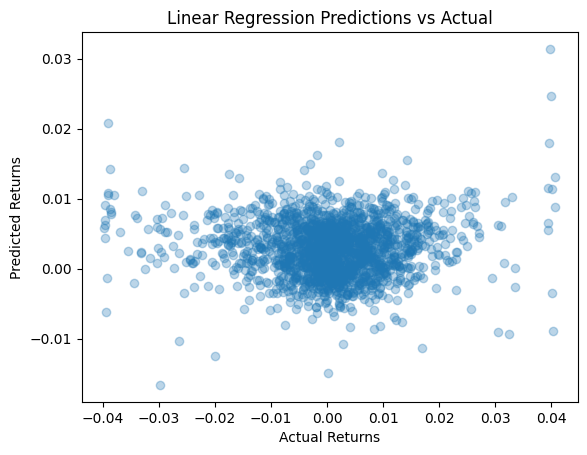

In [12]:

plt.scatter(y_val, y_pred, alpha=0.3)
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Linear Regression Predictions vs Actual")
plt.show()